In [2]:
import numpy as np
from sklearn import linear_model, metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [3]:
data = pd.read_csv('emails.csv')

In [4]:
data.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

spam count: 1500
ham count: 3672


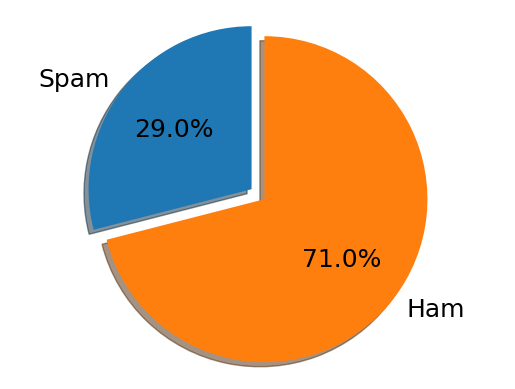

In [5]:
# Սպամ և ոչ սպամ նամակների քանակը
print(f'spam count: {len(data[data.Prediction == 1])}\nham count: {len(data[data.Prediction == 0])}')
labels = 'Spam', 'Ham'
sizes = [len(data[data.Prediction == 1]) * 100 /len(data),
        len(data[data.Prediction == 0]) * 100 /len(data)]
explode = (0.1, 0)  

plt.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [6]:
# Ստուգենք աղյուսակի տվյալների ամբողջականությունը

print(data.isna().sum())
print(f'total NULL sum: {sum(data.isna().sum())}')

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
total NULL sum: 0


In [7]:
# Կրկնվող տողերի առկայությունը
print(data.duplicated().sum() , data.shape, sep = '\n')

0
(5172, 3002)


In [8]:
X = data.iloc[:, 1:3001]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
#  1. LogisticRegression

log_reg_params = {'C': [0.1, 0.2, 0.3, 0.4, 0.5]}
LR = LogisticRegression(solver= 'liblinear')
search = GridSearchCV(LR, log_reg_params, scoring='precision', cv=3)
search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5]}, scoring='precision')

In [10]:
best_LR = search.best_estimator_
best_LR

LogisticRegression(C=0.3, solver='liblinear')

In [11]:
y_pred_LR = best_LR.predict(X_test)

y_pred_LR_upd = best_LR.predict_proba(X_test)
y_pred_LR_upd = np.where(y_pred_LR_upd[:, 1] < 0.65, 0, 1)

Test Accuracy:  0.973
Test Precision:  0.955
Recall:  0.953


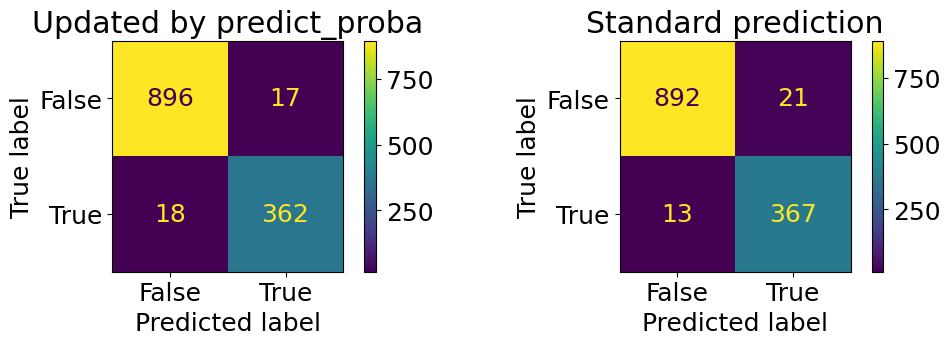

In [34]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_LR_upd)
Precision = metrics.precision_score(y_test, y_pred_LR_upd)
Recall = metrics.recall_score(y_test, y_pred_LR_upd)
print(f'Test Accuracy:  {round(Test_Accuracy, 3)}\nTest Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].set_title('Updated by predict_proba')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_LR_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(ax=axs[0])

axs[1].set_title('Standard prediction')
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred_LR)
sm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels=[False, True])
sm_display1.plot(ax=axs[1])

plt.show()

In [13]:
# 2․ RandomForestClassifier

rf = RandomForestClassifier(n_estimators=120, criterion='entropy') 
rf_params = {'max_depth': range(21, 28, 3), 'min_samples_split': range(3, 13, 2)}
rf_search = GridSearchCV(rf, rf_params, cv=3)

rf_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=120),
             param_grid={'max_depth': range(21, 28, 3),
                         'min_samples_split': range(3, 13, 2)})

In [14]:
best_rf = rf_search.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=21, min_samples_split=11,
                       n_estimators=120)

In [15]:
y_pred_RF = best_rf.predict(X_test)
y_pred_RF_upd = best_rf.predict_proba(X_test)
y_pred_RF_upd = np.where(y_pred_RF_upd[:, 1] < 0.48, 0, 1)

Test Accuracy:  0.975
Test Precision:  0.937
Recall:  0.982


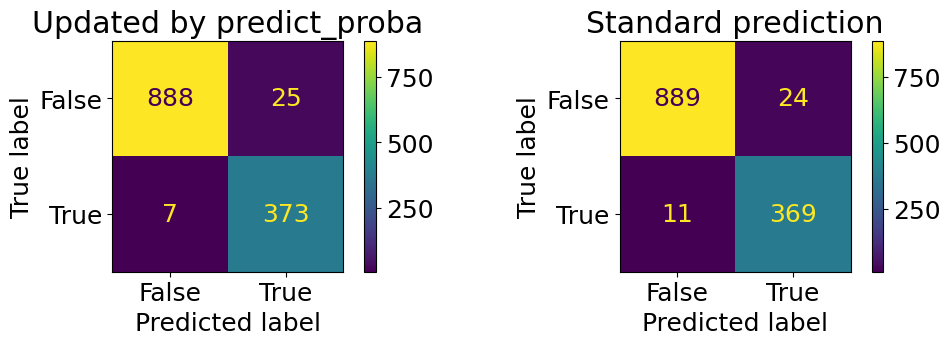

In [28]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_RF_upd)
Precision = metrics.precision_score(y_test, y_pred_RF_upd)
Recall = metrics.recall_score(y_test, y_pred_RF_upd)
print(f'Test Accuracy:  {round(Test_Accuracy, 3)}\nTest Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].set_title('Updated by predict_proba')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_RF_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(ax=axs[0])

axs[1].set_title('Standard prediction')
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred_RF)
sm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels=[False, True])
sm_display1.plot(ax=axs[1])

plt.show()

In [17]:
#  3. MLPClassifier

mlp_search = MLPClassifier( max_iter=3000)
#mlp_params = {'max_iter': [1000, 2000, 3000], 'hidden_layer_sizes': [(50,), (100,), (150,)], 
            #'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam']}
#mlp_search = GridSearchCV(mlp, mlp_params, scoring='average_precision', cv=3)
mlp_search.fit(X_train, y_train)
mlp_search.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [18]:
y_pred_mlp = mlp_search.predict(X_test)

# Տվյալ խնդրում մեր համար կարևոր է փոքրացնել FalsePositive -ում հայտնված նամակների թիվը (որպես spam կանխատեսված ոչ spam
# նամակների) այսինքն մեծացնել precision_score  գործակիցը, վերցնում ենք կանխատեսումների հավանականությունների մատրիցը և 0,55 հավանա-
# կանությունից ցածր արժեքներին տալիս ենք 0 կանխատեսում,բարձրերին՝ 1։

y_pred_mlp_upd = mlp_search.predict_proba(X_test)
y_pred_mlp_upd = np.where(y_pred_mlp_upd[:, 1] < 0.75, 0, 1)

Test_Accuracy:  0.979
Test_Precision:  0.966
Recall:  0.963


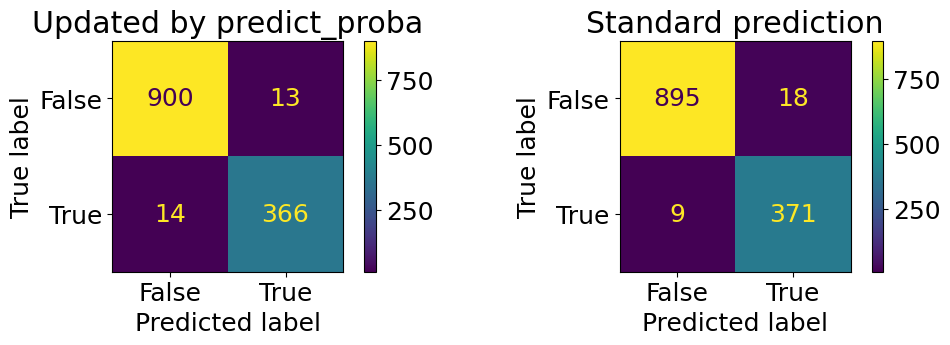

In [27]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_mlp_upd)
Precision = metrics.precision_score(y_test, y_pred_mlp_upd)
Recall = metrics.recall_score(y_test, y_pred_mlp_upd)
print(f'Test_Accuracy:  {round(Test_Accuracy, 3)}\nTest_Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].set_title('Updated by predict_proba')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mlp_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(ax=axs[0])

axs[1].set_title('Standard prediction')
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred_mlp)
sm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels=[False, True])
sm_display1.plot(ax=axs[1])

plt.show()

In [20]:
# Քանի որ այստեղ  կարևոր է ճիշտ նամակները որպես սպամ չկանխատեսելը,  որը արտահայտում է՝ precision_score գործակիցը 
# (նախորդ ալգորիթմով ստացել ենք 20 սխալմամբ սպամ կանխատեսված) փորձենք փոքրացնել այդ թիվը՝ համադրելով RandomForestClassifier, 
# LogisticRegression և MLPClassifier ալգորիթմների արդյունքները 

In [21]:
y_pred_final = np.copy(y_pred_LR_upd)
for i in range(y_pred_final.size):
    if y_pred_RF_upd[i] == 0 or y_pred_mlp_upd[i] == 0:
        y_pred_final[i] = 0
    

Test Accuracy:  0.976
Test Precision:  0.986
Recall:  0.932


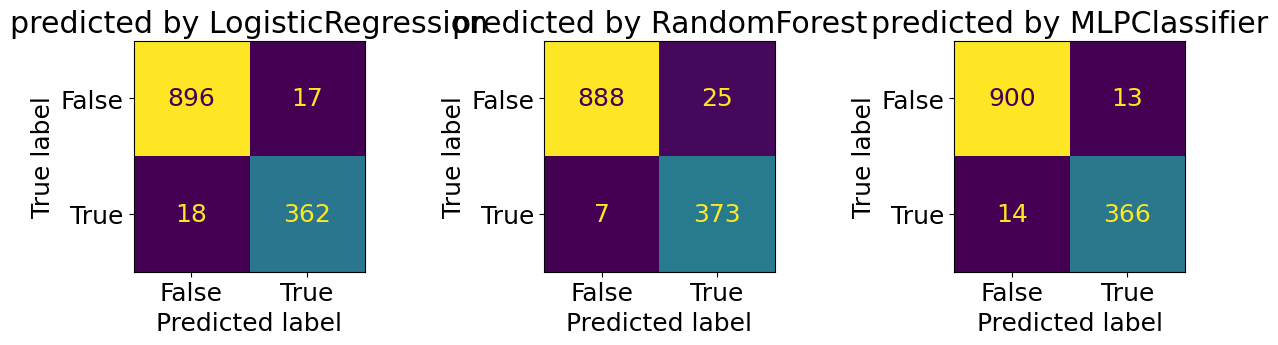

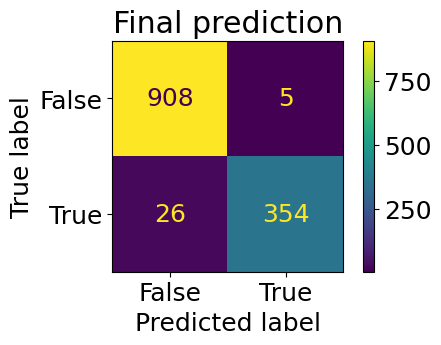

In [33]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_final)
Precision = metrics.precision_score(y_test, y_pred_final)
Recall = metrics.recall_score(y_test, y_pred_final)
print(f'Test Accuracy:  {round(Test_Accuracy, 3)}\nTest Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')


fig, axs = plt.subplots(1, 3, figsize=(15, 3))

axs[0].set_title('predicted by LogisticRegression')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_LR_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(ax=axs[0], colorbar=False)

axs[1].set_title('predicted by RandomForest')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_RF_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(ax=axs[1], colorbar=False)

axs[2].set_title('predicted by MLPClassifier')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mlp_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(ax=axs[2], colorbar=False)


fig, axs = plt.subplots(figsize=(5, 3))
axs.set_title('Final prediction')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_final)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,  display_labels=[False, True])
sm_display.plot(ax=axs)
plt.show()

In [23]:
# հաջողվեց ստանալ 2~3 սխալ կանխատեսում ոչ սպամ նամակների համար (Test_Precision:  0.99) 
# և նույնիսկ բարձրացնել accuracy_score գործակիցը։  380 սպամ նամակից կստատանք միայն 27-28-ը 